In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\KIIT\Downloads\fitness_class_2212.csv")
print(data.head())

   booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   

   category  attended  
0  Strength         0  
1      HIIT         0  
2  Strength         0  
3   Cycling         0  
4      HIIT         0  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None


In [4]:
average = data['weight'].mean()
print(average)
data['weight'].fillna(average, inplace=True)

82.61037837837839


In [5]:
data['weight'] = round(data['weight'], 2)
print(data['weight'])

0       79.56
1       79.01
2       74.53
3       86.12
4       69.29
        ...  
1495    79.51
1496    89.55
1497    87.38
1498    68.64
1499    94.39
Name: weight, Length: 1500, dtype: float64


In [6]:
# Convert the 'days_before' column to strings
data['days_before'] = data['days_before'].astype(str)

# Extract numeric portion and convert to integers
data['days_before'] = data['days_before'].str.extract('(\d+)', expand=False).astype(int)

# Print the updated DataFrame
print(data['days_before'])

0        8
1        2
2       14
3       10
4        8
        ..
1495    10
1496     2
1497     4
1498    14
1499     8
Name: days_before, Length: 1500, dtype: int32


In [7]:
print(data['time'].unique)
# Defining the order of the ordinal variable using a Categorical data type
ordinal_categories = ['AM', 'PM']
data['time'] = pd.Categorical(data['time'], categories=ordinal_categories, ordered=True)
print(data['time'])

<bound method Series.unique of 0       PM
1       AM
2       AM
3       AM
4       AM
        ..
1495    AM
1496    AM
1497    AM
1498    AM
1499    AM
Name: time, Length: 1500, dtype: object>
0       PM
1       AM
2       AM
3       AM
4       AM
        ..
1495    AM
1496    AM
1497    AM
1498    AM
1499    AM
Name: time, Length: 1500, dtype: category
Categories (2, object): ['AM' < 'PM']


In [8]:
categories = ['Yoga', 'Aqua','Strength','HIIT','Cycling']
data['category'] = pd.Categorical(data['category'], categories=categories, ordered=True)
print(data['category'])

0       Strength
1           HIIT
2       Strength
3        Cycling
4           HIIT
          ...   
1495        HIIT
1496    Strength
1497        HIIT
1498        Aqua
1499     Cycling
Name: category, Length: 1500, dtype: category
Categories (5, object): ['Yoga' < 'Aqua' < 'Strength' < 'HIIT' < 'Cycling']


<AxesSubplot:xlabel='attended', ylabel='count'>

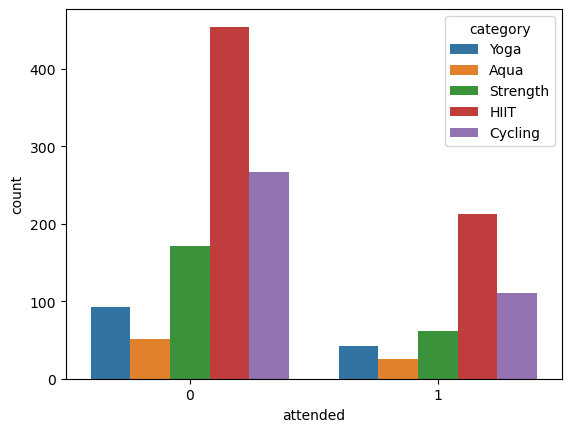

In [40]:
sns.countplot(x='attended',data=data,hue='category')

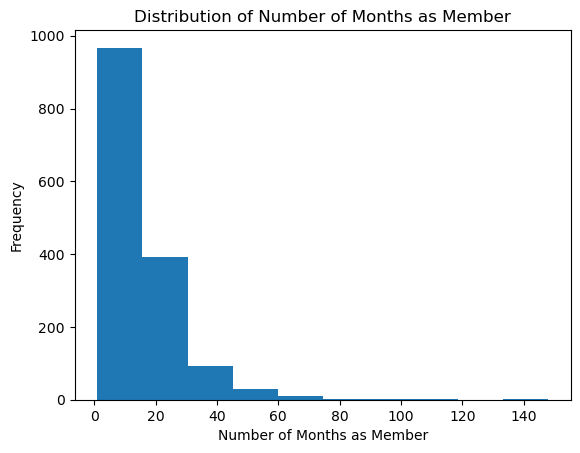

In [9]:
# Creating a histogram to visualize the distribution
plt.hist(data['months_as_member'], bins=10)

# Set labels and title
plt.xlabel('Number of Months as Member')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Months as Member')

# Show the plot
plt.show()


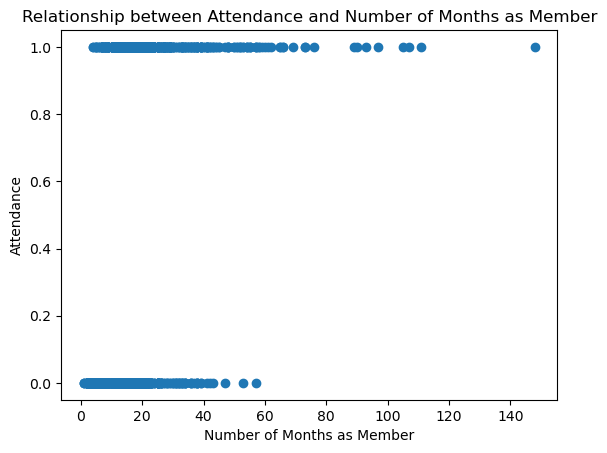

In [10]:
plt.scatter(data['months_as_member'], data['attended'])

# Set labels and title
plt.xlabel('Number of Months as Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Number of Months as Member')

# Show the plot
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into input features (X) and target variable (y)
X = data[['months_as_member']]
y = data['attended']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Calculate accuracy
lor_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression:", lor_accuracy)

Accuracy of logistic regression: 0.7633333333333333


In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called 'data' with columns 'months_as_member' and 'attended'

# Split the data into input features (X) and target variable (y)
X = data[['months_as_member']]
y = data['attended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using random forest is :", rf_accuracy)


Accuracy: 0.7466666666666667
